In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ghibtools as gh
import pandas as pd
import seaborn as sns
from params import *
import xarray as xr

In [3]:
participant = 'P04'

In [4]:
da = xr.open_dataarray(f'../Analyses/PSD/{participant}_psds.nc')

In [5]:
da

<xarray.DataArray (odor: 3, bloc: 4, trial: 3, chan: 36, freq: 50001)>
[64801296 values with dtype=float64]
Coordinates:
  * freq     (freq) float64 0.0 0.01 0.02 0.03 0.04 ... 500.0 500.0 500.0 500.0
  * chan     (chan) object 'Fp1' 'Fz' 'F3' 'F7' ... 'RespiVentrale' 'GSR' 'FCI'
  * bloc     (bloc) object 'Free' 'Slow' 'Comfort' 'Fast'
  * odor     (odor) object 'odor_o' 'odor_+' 'odor_-'
  * trial    (trial) int32 1 2 3

In [6]:
da.sel(freq = slice(0,0.6))

<xarray.DataArray (odor: 3, bloc: 4, trial: 3, chan: 36, freq: 61)>
[79056 values with dtype=float64]
Coordinates:
  * freq     (freq) float64 0.0 0.01 0.02 0.03 0.04 ... 0.56 0.57 0.58 0.59 0.6
  * chan     (chan) object 'Fp1' 'Fz' 'F3' 'F7' ... 'RespiVentrale' 'GSR' 'FCI'
  * bloc     (bloc) object 'Free' 'Slow' 'Comfort' 'Fast'
  * odor     (odor) object 'odor_o' 'odor_+' 'odor_-'
  * trial    (trial) int32 1 2 3

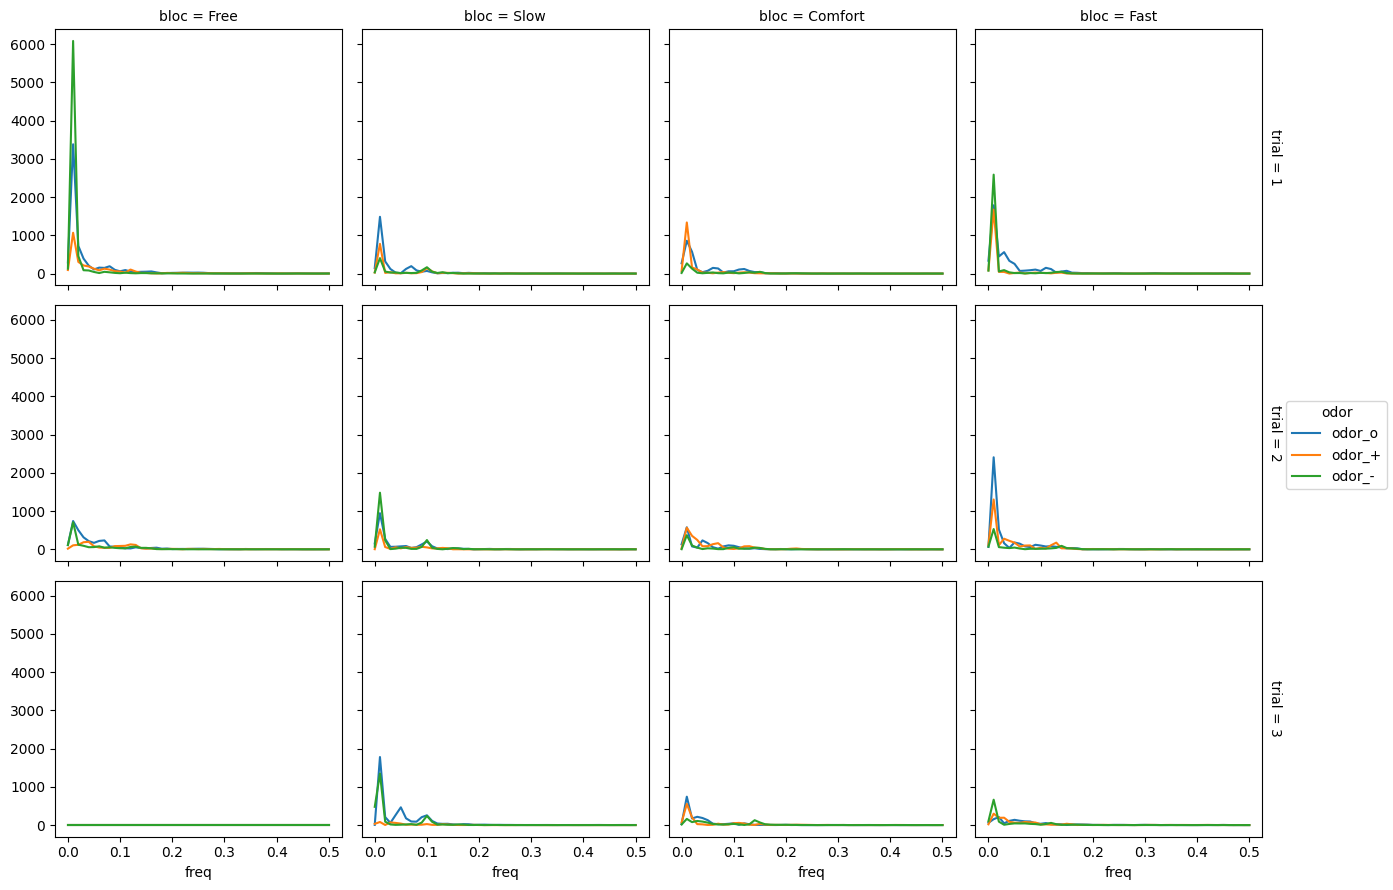

In [13]:
da.sel(freq = slice(0,0.5), chan = 'Fp2').plot.line(x='freq', row = 'trial', hue = 'odor' , col = 'bloc')

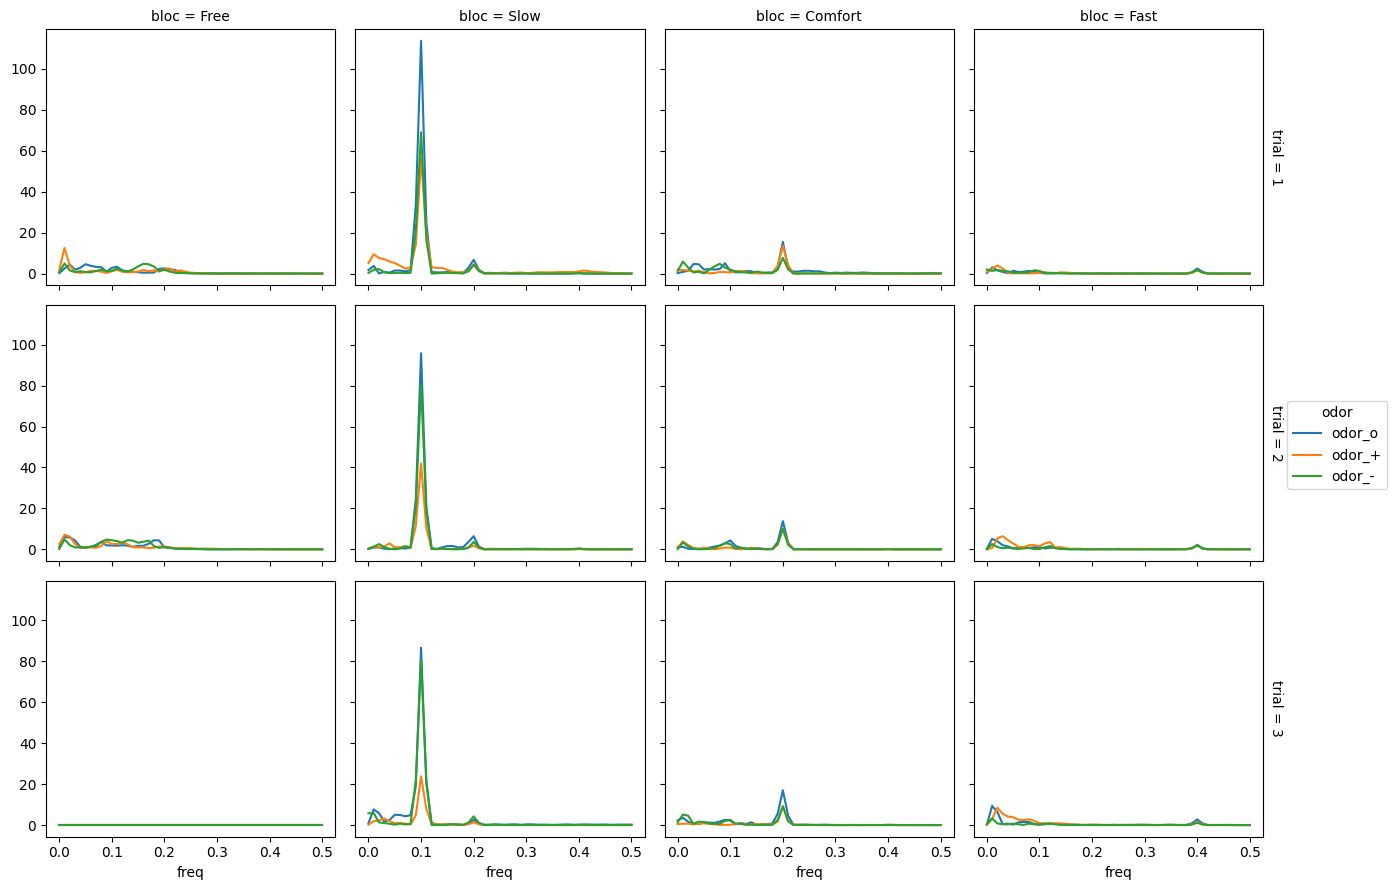

In [7]:
da.sel(freq = slice(0,0.5), chan = 'FCI').plot.line(x='freq', row = 'trial', hue = 'odor' , col = 'bloc')

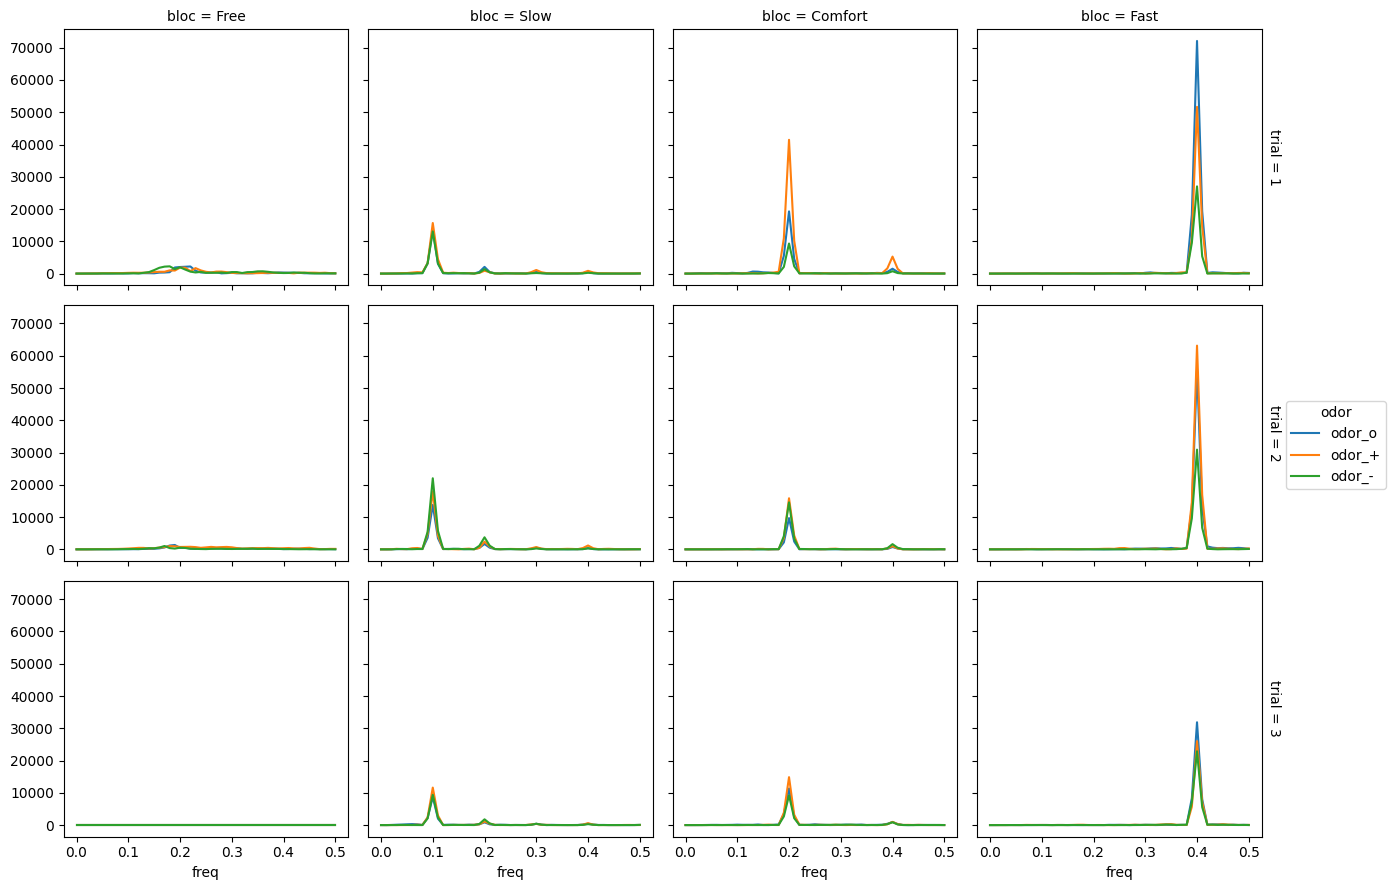

In [8]:
da.sel(freq = slice(0,0.5), chan = 'RespiNasale').plot.line(x='freq', row = 'trial', hue = 'odor' , col = 'bloc')

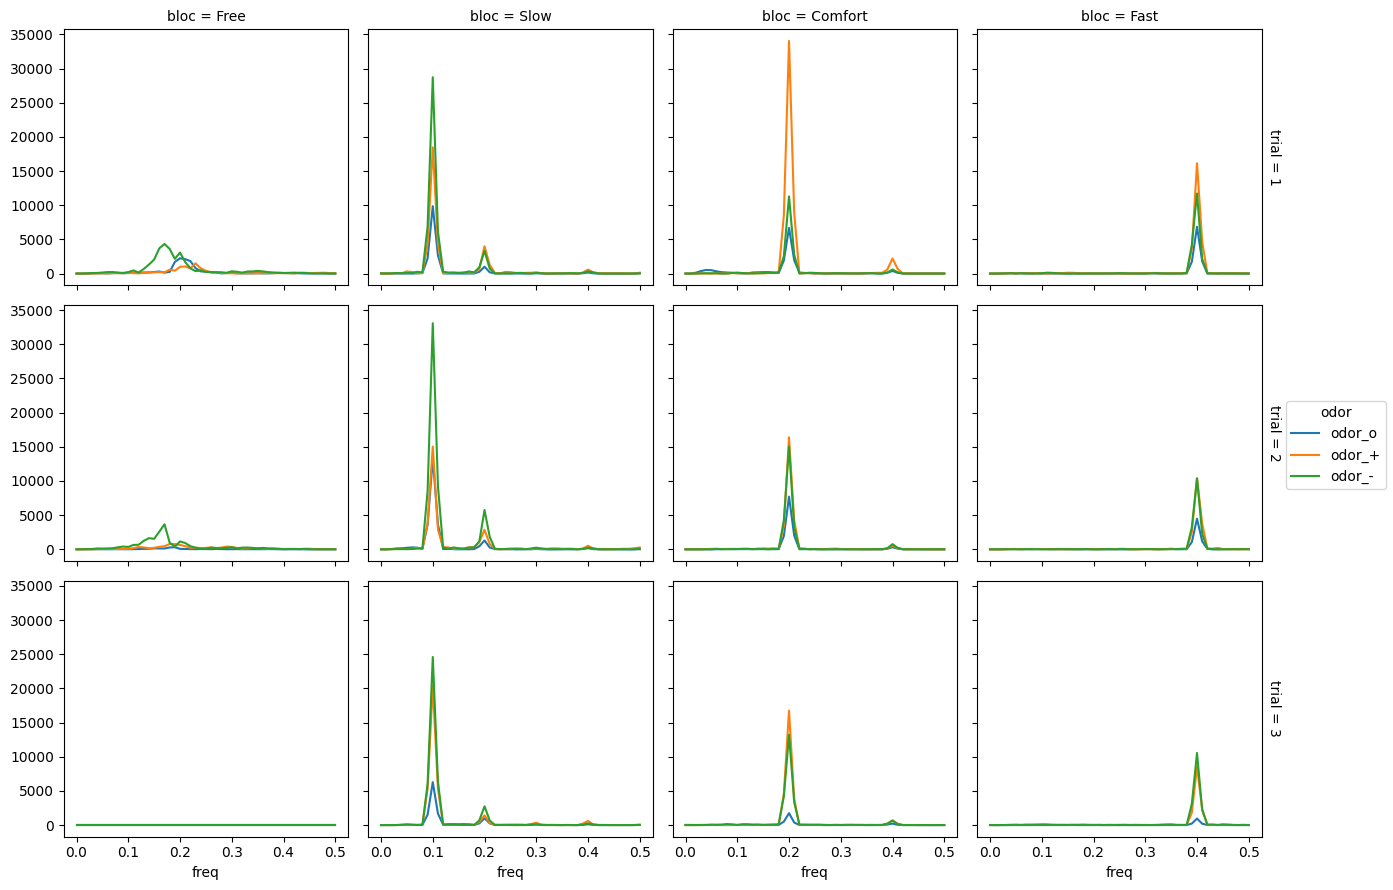

In [9]:
da.sel(freq = slice(0,0.5), chan = 'RespiVentrale').plot.line(x='freq', row = 'trial', hue = 'odor' , col = 'bloc')

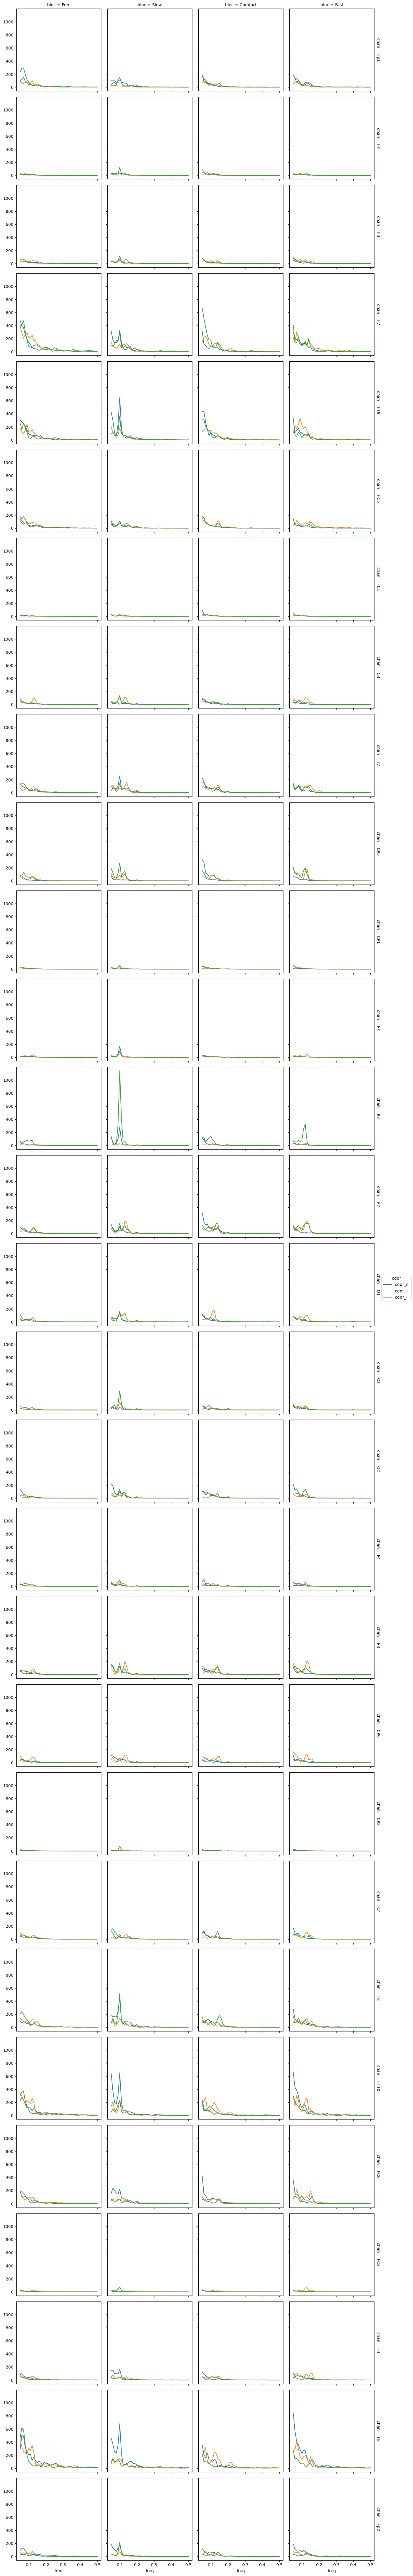

In [10]:
da.sel(freq = slice(0.05,0.5), chan = [chan for chan in eeg_chans if not chan in ['TP9','TP10']]).mean('trial').plot.line(x='freq',  row = 'chan', hue = 'odor' , col = 'bloc')

In [11]:
da.loc['odor_o','Slow',1,'Fp2',100:102].integrate('freq')

<xarray.DataArray ()>
array(0.002726)
Coordinates:
    chan     <U3 'Fp2'
    bloc     <U4 'Slow'
    odor     <U6 'odor_o'
    trial    int32 1

In [12]:
da.loc['odor_o','Slow',1,'Fp2',100:104].integrate('freq')

<xarray.DataArray ()>
array(0.00533883)
Coordinates:
    chan     <U3 'Fp2'
    bloc     <U4 'Slow'
    odor     <U6 'odor_o'
    trial    int32 1